In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [5]:
# economic parameters
beta = 0.7
gamma = 5.0
alpha = 0.3

In [6]:
# system of equations
def euler_equation(kp, k0, T):

    # production today
    w = (1.0 - alpha) * k0 ** alpha

    # production tomorrow
    yp = kp ** alpha
    rp = alpha * kp ** (alpha - 1.0) - 1.0

    # consumption today and tomorrow
    c = w - kp - T
    cp = (1 + rp) * kp + T

    # euler equation
    ee_res = c ** (-gamma) - beta * (1 + rp) * cp ** (-gamma)

    return ee_res

In [7]:
# solve the model along the simulation
t_end = 100
n_max = 100
T_grid = np.linspace(0, 0.05, n_max)

k_ts = np.zeros((n_max, t_end))
k_ts[:, 0] = 0.1

r_ts = np.zeros((n_max, t_end))
w_ts = np.zeros((n_max, t_end))
cy_ts = np.zeros((n_max, t_end))
co_ts = np.zeros((n_max, t_end))
u_ts = np.zeros((n_max, t_end))

for i in range(n_max):
    for t in range(t_end-1):
        # solve system of equations given the current capital stock
        lb = 0.01
        ub = 0.99 * ((1.0 - alpha) * k_ts[i, t] ** alpha - T_grid[i])
        sol = scipy.optimize.root_scalar(euler_equation, bracket=[lb, ub], args=(k_ts[i, t], T_grid[i]), method='brentq')
        k_ts[i, t+1] = sol.root

        # compute factor prices and utility
        r_ts[i, t] = alpha * k_ts[i, t] ** (alpha - 1) - 1
        w_ts[i, t] = (1 - alpha) * k_ts[i, t] ** alpha
        cy_ts[i, t] = w_ts[i, t] - k_ts[i, t+1] - T_grid[i]
        co_ts[i, t] = (1 + r_ts[i, t]) * k_ts[i, t] + T_grid[i]

        # compute life-time utility of agents born in period t
        r_tom = alpha * k_ts[i, t+1] ** (alpha - 1) - 1
        co_tom = (1 + r_tom) * k_ts[i, t+1] + T_grid[i]
        u_ts[i, t] = 1 / (1 - gamma) * (cy_ts[i, t] ** (1 - gamma) + beta * co_tom ** (1 - gamma))

Optimal Transfer: 0.022222222222222223


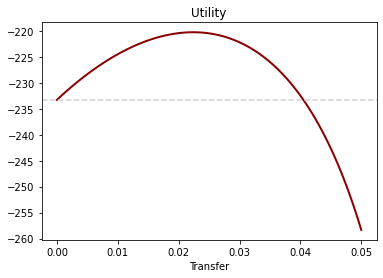

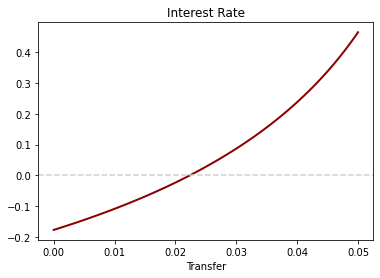

In [8]:
# steady state utility comparison
plt.figure()
plt.plot(T_grid, u_ts[:, t_end-2], color='darkred', linewidth=2)
plt.axhline(y=u_ts[0, t_end-2], color='lightgrey', linestyle='dashed')
plt.xlabel('Transfer')
plt.title('Utility')

plt.figure()
plt.plot(T_grid, r_ts[:, t_end-2], color='darkred', linewidth=2)
plt.axhline(y=0.0, color='lightgrey', linestyle='dashed')
plt.xlabel('Transfer')
plt.title('Interest Rate')

idx_opt = np.argmax(u_ts[:, t_end-2])
print('Optimal Transfer: ' + str(T_grid[idx_opt]))

plt.show()